In [442]:
# Load libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LinearRegression

### Data exploration

In [144]:
#Read data
#Load data
item_spend = pd.read_csv('item_spend.csv')
activity_played = pd.read_csv('activity_played.csv')
gen_player_stats = pd.read_csv('gen_player_stats.csv')

In [145]:
item_spend

,account_id,platform_id,occur_date,item,item_type,item_sub_type,money_spent
0,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385
1,3820,PS4,2020-11-12,Vapid GB200,CAR,SPORTS,375005.743577
2,193,PS4,2020-11-27,Vulcar Warrener,CAR,SEDAN,47873.073648
3,4945,PS4,2020-11-27,Cheval Marshall,CAR,OFF ROAD,0.000000
4,4237,XBOX,2020-09-02,Albany V-STR,CAR,SPORTS,512640.830316
...,...,...,...,...,...,...,...
155745,5824,PC,2020-11-02,Heavy Shotgun,WEAPON,SHOTGUNS,5405.667899
155746,5824,PC,2020-11-02,Knuckle Duster,WEAPON,MELEE,2992.067103
155747,5304,XBOX,2020-11-02,Heavy Shotgun,WEAPON,SHOTGUNS,5405.667899
155748,4626,PC,2020-11-02,Knuckle Duster,WEAPON,MELEE,2992.067103


In [146]:
activity_played

,account_id,platform_id,occur_date,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
0,123,PC,2020-10-10,Nightclub Owner,2.421073,0,0,0,13847.602000,497.001376,0
1,6579,XBOX,2020-09-23,Heist,3.755906,0,0,0,0.000000,331.334251,0
2,4223,XBOX,2020-09-07,Executive,1.075432,0,0,0,0.000000,3512.143060,1
3,1260,XBOX,2020-11-21,Heist,2.113035,0,0,0,0.000000,497.001376,0
4,8638,XBOX,2020-09-03,Heist,3.183063,0,0,0,0.000000,497.001376,0
...,...,...,...,...,...,...,...,...,...,...,...
845613,1443,XBOX,2020-11-08,Biker,1.345641,0,0,0,389.758561,99.400275,0
845614,2860,XBOX,2020-09-10,Freeroam - Business Battles,4.523300,0,0,0,10393.561631,2650.674007,0
845615,1143,XBOX,2020-10-15,Heist,2.331591,9,0,0,0.000000,716.675985,1
845616,6028,PC,2020-10-20,Heist,0.672269,17,0,0,0.000000,585.136287,1


In [147]:
gen_player_stats.sort_values('occur_date')

,account_id,platform_id,occur_date,ltd_days_played,first_day_played,evc_balance,pvc_balance,char_rank,daily_playtime
228026,8803,XBOX,2020-09-01,202.0,2018-08-17,4.266222e+05,0.000000,29.0,0.122964
169474,6504,XBOX,2020-09-01,46.0,2017-02-15,4.063925e+05,0.000000,18.0,0.018577
169475,6436,XBOX,2020-09-01,102.0,2020-03-02,3.634380e+03,0.000000,56.0,0.322874
169476,6450,PC,2020-09-01,153.0,2020-04-22,2.138410e+09,0.000000,347.0,0.547038
169477,6543,PS4,2020-09-01,501.0,2018-03-01,0.000000e+00,0.000000,54.0,0.214545
...,...,...,...,...,...,...,...,...,...
144741,5474,PC,2020-11-30,116.0,2017-10-28,1.955383e+05,54755.828826,42.0,0.038877
188682,7132,XBOX,2020-11-30,15.0,2020-10-02,1.036005e+03,0.000000,8.0,1.699980
188683,7177,PC,2020-11-30,136.0,2020-04-16,5.028062e+06,0.000000,72.0,1.035296
62045,2301,XBOX,2020-11-30,424.0,2016-03-28,5.376581e+06,0.000000,248.0,2.504449


In [148]:
gen_player_stats['account_id'].value_counts()

6297    91
2680    91
8766    91
1093    91
4854    91
        ..
8069    10
4289    10
752     10
3847    10
1682    10
Name: account_id, Length: 9527, dtype: int64

In [149]:
activity_played['activity_type'].value_counts()

Heist                          473976
Executive                      126278
Biker                           96970
Race                            53395
Gunrunner                       36540
Freeroam - Business Battles     28338
Casino                          21453
Nightclub Owner                  8668
Name: activity_type, dtype: int64

In [150]:
ind_player_rank = gen_player_stats.groupby('account_id')
gen_player_stats['char_rank'].value_counts()

2.0      5572
22.0     5129
26.0     4921
24.0     4904
16.0     4835
         ... 
698.0       1
710.0       1
453.0       1
702.0       1
706.0       1
Name: char_rank, Length: 649, dtype: int64

In [151]:
gen_player_stats['pvc_balance'].describe()

count    2.479840e+05
mean     1.798549e+04
std      2.911631e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.944387e+07
Name: pvc_balance, dtype: float64

In [516]:
real_money = gen_player_stats.groupby('account_id').sum()['pvc_balance']
count_spend_money = (real_money != 0).sum()
num_player= gen_player_stats.groupby('account_id').sum().shape[0]
print("There are",count_spend_money, "players who spend real money out of the",num_player)

There are 1343 players who spend real money out of the 9527


In [153]:
item_spend.groupby(['account_id']).sum().sort_values('money_spent')

,money_spent
account_id,
9526,0.000000e+00
7055,0.000000e+00
3900,0.000000e+00
3815,0.000000e+00
7348,0.000000e+00
...,...
7238,1.317464e+08
207,1.353708e+08
4312,1.405472e+08


In [154]:
item_spend['item_type'].value_counts()

CAR           57371
WEAPON        54728
PROPERTY      19662
BIKE          11993
HELICOPTER     4398
PLANE          2523
CYCLE          2331
OTHER          1019
BOAT            810
TANK            297
JET             256
TRUCK            37
Name: item_type, dtype: int64

In [155]:
mean_spend_per_type = item_spend.groupby(['item_type']).mean()
mean_spend_per_type.sort_values('money_spent')

,account_id,money_spent
item_type,,
CYCLE,4761.324753,1.349291e+03
WEAPON,4686.268912,1.288818e+04
BOAT,4428.348148,9.893133e+04
BIKE,4647.221796,2.371508e+05
HELICOPTER,4751.601864,2.725941e+05
CAR,4694.471318,2.790681e+05
PROPERTY,4761.651460,3.567896e+05
TRUCK,4703.270270,5.360383e+05
OTHER,4531.395486,1.013556e+06


In [156]:
sum_spend_per_type = item_spend.groupby(['item_type']).sum()
sum_spend_per_type.sort_values('money_spent')

,account_id,money_spent
item_type,,
CYCLE,11098648,3.145197e+06
TRUCK,174021,1.983342e+07
BOAT,3586962,8.013438e+07
JET,1256577,3.640508e+08
TANK,1426304,4.063395e+08
WEAPON,256470125,7.053442e+08
OTHER,4617492,1.032813e+09
HELICOPTER,20897545,1.198869e+09
PLANE,11960598,2.754174e+09


In [157]:
item_spend.isna().sum()

account_id          0
platform_id         0
occur_date          0
item             1615
item_type         325
item_sub_type     481
money_spent         0
dtype: int64

In [158]:
activity_played.isna().sum()

account_id       0
platform_id      0
occur_date       0
activity_type    0
time_spent       0
kills            0
deaths           0
suicides         0
money_earned     0
rp_earned        0
success          0
dtype: int64

In [159]:
gen_player_stats.isna().sum()

account_id          0
platform_id         0
occur_date          0
ltd_days_played     0
first_day_played    0
evc_balance         0
pvc_balance         0
char_rank           0
daily_playtime      0
dtype: int64

In [160]:
ind_player_activity = activity_played.groupby('account_id')
ind_player_activity['activity_type'].value_counts()

account_id  activity_type              
0           Heist                          17
            Casino                         10
            Freeroam - Business Battles     9
            Biker                           5
            Gunrunner                       5
                                           ..
9526        Heist                           6
            Race                            4
            Biker                           3
            Executive                       2
            Freeroam - Business Battles     2
Name: activity_type, Length: 40950, dtype: int64

In [161]:
# Measure how fast the players level up
# How many rank/day? 
# Some people started later into the 3 months period
# gen_player_stats.sort_values('occur_date')
ind_player_stats = gen_player_stats.groupby('account_id')
ind_player_stats.head()

,account_id,platform_id,occur_date,ltd_days_played,first_day_played,evc_balance,pvc_balance,char_rank,daily_playtime
0,0,XBOX,2020-10-19,184.0,2019-05-11,4.053223e+05,0.0,35.0,0.124253
1,1,PS4,2020-10-19,154.0,2017-03-16,1.686933e+03,0.0,44.0,0.198681
2,2,XBOX,2020-10-19,76.0,2020-02-08,2.351439e+05,0.0,20.0,1.962876
3,3,XBOX,2020-10-19,24.0,2015-10-14,1.414707e+05,0.0,20.0,0.865092
4,4,XBOX,2020-10-19,579.0,2018-05-19,3.238627e+01,0.0,99.0,1.133067
...,...,...,...,...,...,...,...,...,...
246865,9523,PC,2020-09-03,93.0,2020-01-01,8.274085e+08,0.0,54.0,0.738463
246925,9417,PS4,2020-10-28,178.0,2019-01-08,1.580087e+05,0.0,52.0,0.000000
247080,9492,PS4,2020-09-05,270.0,2016-05-03,6.787236e+03,0.0,64.0,0.263328
247228,9494,XBOX,2020-09-04,302.0,2018-05-12,1.960223e+05,0.0,76.0,0.930748


In [162]:
# multiple regression
# correlation between rank, ltd_days_played and daily_playtime                                                                                                                                                                                                                                                                                                                                 
ind_total_playtime = gen_player_stats.groupby('account_id').sum()['daily_playtime']
ind_total_playtime

account_id
0       10.101785
1       13.870489
2       17.796335
3       22.613138
4       14.678832
          ...    
9522     2.465090
9523     4.248382
9524     6.578154
9525     0.578406
9526     9.518471
Name: daily_playtime, Length: 9527, dtype: float64

In [163]:
ind_avg_rank = gen_player_stats.groupby('account_id').mean()['char_rank']
ind_avg_rank

account_id
0        34.076923
1        39.333333
2        18.585366
3        19.823529
4        98.692308
           ...    
9522      9.850000
9523     54.900000
9524     41.000000
9525    114.000000
9526     30.250000
Name: char_rank, Length: 9527, dtype: float64

In [164]:
ind_avg_daysplayed = gen_player_stats.groupby('account_id').mean()['ltd_days_played']
ind_avg_daysplayed

account_id
0       175.487179
1       133.487179
2        78.000000
3        27.735294
4       567.730769
           ...    
9522     39.750000
9523     96.800000
9524    230.214286
9525    926.300000
9526    116.250000
Name: ltd_days_played, Length: 9527, dtype: float64

In [165]:
activity_played

,account_id,platform_id,occur_date,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
0,123,PC,2020-10-10,Nightclub Owner,2.421073,0,0,0,13847.602000,497.001376,0
1,6579,XBOX,2020-09-23,Heist,3.755906,0,0,0,0.000000,331.334251,0
2,4223,XBOX,2020-09-07,Executive,1.075432,0,0,0,0.000000,3512.143060,1
3,1260,XBOX,2020-11-21,Heist,2.113035,0,0,0,0.000000,497.001376,0
4,8638,XBOX,2020-09-03,Heist,3.183063,0,0,0,0.000000,497.001376,0
...,...,...,...,...,...,...,...,...,...,...,...
845613,1443,XBOX,2020-11-08,Biker,1.345641,0,0,0,389.758561,99.400275,0
845614,2860,XBOX,2020-09-10,Freeroam - Business Battles,4.523300,0,0,0,10393.561631,2650.674007,0
845615,1143,XBOX,2020-10-15,Heist,2.331591,9,0,0,0.000000,716.675985,1
845616,6028,PC,2020-10-20,Heist,0.672269,17,0,0,0.000000,585.136287,1


In [166]:
ind_success_rate = activity_played.groupby('account_id').mean()['success']
ind_success_rate

account_id
0       0.280000
1       0.830189
2       0.537037
3       0.681818
4       0.000000
          ...   
9522    0.500000
9523    0.851852
9524    0.071429
9525    0.000000
9526    0.235294
Name: success, Length: 9289, dtype: float64

In [167]:
ind_avg_time_per_act = activity_played.groupby('account_id').mean()['time_spent']
ind_avg_time_per_act

account_id
0       2.694010
1       2.448929
2       2.946185
3       2.615335
4       8.979048
          ...   
9522    2.272974
9523    1.532986
9524    1.334536
9525    2.612922
9526    2.076687
Name: time_spent, Length: 9289, dtype: float64

In [168]:
time_and_success = pd.concat([ind_avg_time_per_act,ind_success_rate],axis=1)
time_and_success

,time_spent,success
account_id,,
0,2.694010,0.280000
1,2.448929,0.830189
2,2.946185,0.537037
3,2.615335,0.681818
4,8.979048,0.000000
...,...,...
9522,2.272974,0.500000
9523,1.532986,0.851852
9524,1.334536,0.071429


In [169]:
# divide 80-20 training testing set
# multiple regression
predictor = pd.concat([ind_avg_rank,ind_avg_daysplayed],axis=1)
predictor

,char_rank,ltd_days_played
account_id,,
0,34.076923,175.487179
1,39.333333,133.487179
2,18.585366,78.000000
3,19.823529,27.735294
4,98.692308,567.730769
...,...,...
9522,9.850000,39.750000
9523,54.900000,96.800000
9524,41.000000,230.214286


In [170]:
activity_played['account_id'].value_counts()

8230    2508
5823    2361
1800    2324
5401    2233
4854    2169
        ... 
6791       1
1055       1
6790       1
2037       1
5845       1
Name: account_id, Length: 9289, dtype: int64

In [185]:
ind_avg_time_per_act = activity_played.groupby('account_id').sum()['time_spent']

ind_total_playtime = gen_player_stats.groupby('account_id').sum()['daily_playtime']

time_vs_time = pd.concat([ind_avg_time_per_act,ind_total_playtime],axis=1)
time_vs_time

,time_spent,daily_playtime
account_id,,
0,134.700495,10.101785
1,129.793234,13.870489
2,159.093987,17.796335
3,287.686893,22.613138
4,17.958095,14.678832
...,...,...
9522,4.545949,2.465090
9523,41.390627,4.248382
9524,18.683499,6.578154


In [172]:
activity_played.sort_values(['occur_date','account_id'])

,account_id,platform_id,occur_date,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
31126,1,PS4,2020-09-01,Biker,0.729565,0,0,0,0.000000,0.000000,0
205227,1,PS4,2020-09-01,Race,3.540150,0,0,0,13875.404777,4612.172773,1
18811,9,XBOX,2020-09-01,Executive,4.517896,0,0,0,10364.459658,497.001376,1
32325,9,XBOX,2020-09-01,Heist,1.317739,0,0,0,270.232602,82.170894,0
88381,9,XBOX,2020-09-01,Biker,2.129248,0,0,0,0.000000,198.800551,0
...,...,...,...,...,...,...,...,...,...,...,...
650852,9512,PC,2020-11-30,Biker,0.594460,0,0,0,0.000000,0.000000,0
191624,9519,PS4,2020-11-30,Biker,3.637014,0,0,0,0.000000,331.334251,0
392478,9519,PS4,2020-11-30,Biker,2.907450,0,0,0,0.000000,265.067401,0
580404,9519,PS4,2020-11-30,Executive,7.225391,0,0,0,9491.400481,497.001376,1


In [173]:
activity_played.groupby('activity_type').mean().sort_values('time_spent')

,account_id,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
activity_type,,,,,,,,
Casino,4812.297674,1.425201,19.100592,0.152147,0.000000,1002.520258,427.727729,0.223605
Heist,4677.431094,2.002015,8.095528,0.037027,0.000418,9105.173992,3324.009237,0.341914
Executive,4653.746092,2.040761,0.000000,0.214645,0.000000,9414.413216,723.509143,0.852136
Race,4532.353479,2.329375,0.041165,0.132559,0.000000,1959.233109,23097.740066,1.000000
Nightclub Owner,4698.911398,2.566882,0.000000,0.000000,0.000000,63068.974205,428.857679,0.000923
Biker,4682.073414,2.702272,0.000000,4.391554,0.000000,7301.648303,186.154496,0.048345
Gunrunner,4682.601752,3.201218,0.000000,0.000000,0.000000,27872.097889,418.318106,0.000000
Freeroam - Business Battles,4736.449608,5.016076,0.000000,0.000000,0.000000,3326.435780,591.522486,0.389900


In [174]:
activity_played.groupby('activity_type').sum().sort_values('money_earned')

,account_id,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
activity_type,,,,,,,,
Casino,103238222,30574.836939,409765,3264,0,2.150707e+07,9.176043e+06,4797
Freeroam - Business Battles,134221509,142145.552604,0,0,0,9.426454e+07,1.676256e+07,11049
Race,242005014,124376.986262,2198,7078,0,1.046133e+08,1.233304e+09,53395
Nightclub Owner,40730164,22249.734214,0,0,0,5.466819e+08,3.717338e+06,8
Biker,454020659,262039.277039,0,425849,0,7.080408e+08,1.805140e+07,4688
Gunrunner,171102268,116972.507441,0,0,0,1.018446e+09,1.528534e+07,0
Executive,587665749,257703.264687,0,27105,0,1.188833e+09,9.136329e+07,107606
Heist,2216990080,948907.075460,3837086,17550,198,4.315634e+09,1.575501e+09,162059


In [175]:
activity_played.groupby('account_id').mean()

,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
account_id,,,,,,,
0,2.694010,4.720000,0.900000,0.0,884.803902,276.591206,0.280000
1,2.448929,1.339623,0.433962,0.0,2011.972914,819.195803,0.830189
2,2.946185,0.611111,0.666667,0.0,11330.396857,431.409466,0.537037
3,2.615335,0.090909,0.554545,0.0,10150.231818,442.692681,0.681818
4,8.979048,0.000000,0.000000,0.0,2598.390408,497.001376,0.000000
...,...,...,...,...,...,...,...
9522,2.272974,0.000000,0.000000,0.0,378.065804,110.996974,0.500000
9523,1.532986,0.000000,0.000000,0.0,442.688736,887.239494,0.851852
9524,1.334536,7.500000,0.000000,0.0,8.778848,19.146386,0.071429


In [176]:
activity_played['occur_date'].value_counts().sort_values()

2020-10-14     5818
2020-10-15     6375
2020-10-06     6742
2020-10-09     6777
2020-10-08     6793
              ...  
2020-11-21    13930
2020-11-14    14145
2020-11-15    14797
2020-11-22    14998
2020-11-29    15210
Name: occur_date, Length: 91, dtype: int64

In [177]:
activity_played.groupby('occur_date').mean().sort_values('time_spent')

,account_id,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
occur_date,,,,,,,,
2020-11-18,4578.967949,2.115665,5.937856,0.428241,0.000178,7967.979639,397.955474,0.389868
2020-11-29,4564.827350,2.118587,5.849967,0.373570,0.000197,8623.536667,378.814798,0.390598
2020-11-16,4634.402555,2.124947,6.001972,0.445597,0.000514,8345.857796,376.439999,0.377947
2020-11-20,4540.868722,2.143296,5.040705,0.473656,0.000264,8493.114935,492.384358,0.447313
2020-11-17,4803.983020,2.146590,5.785773,0.466269,0.000184,8121.787681,369.431273,0.360991
...,...,...,...,...,...,...,...,...
2020-11-09,4561.232094,2.347193,4.774840,0.731173,0.000108,10850.656822,392.780294,0.358327
2020-10-10,4871.192042,2.349180,4.817721,0.698344,0.000124,8355.335291,481.165180,0.397059
2020-11-07,4638.009142,2.362611,4.508439,0.618143,0.000176,9195.659044,418.254328,0.371572


In [178]:
activity_played

,account_id,platform_id,occur_date,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
0,123,PC,2020-10-10,Nightclub Owner,2.421073,0,0,0,13847.602000,497.001376,0
1,6579,XBOX,2020-09-23,Heist,3.755906,0,0,0,0.000000,331.334251,0
2,4223,XBOX,2020-09-07,Executive,1.075432,0,0,0,0.000000,3512.143060,1
3,1260,XBOX,2020-11-21,Heist,2.113035,0,0,0,0.000000,497.001376,0
4,8638,XBOX,2020-09-03,Heist,3.183063,0,0,0,0.000000,497.001376,0
...,...,...,...,...,...,...,...,...,...,...,...
845613,1443,XBOX,2020-11-08,Biker,1.345641,0,0,0,389.758561,99.400275,0
845614,2860,XBOX,2020-09-10,Freeroam - Business Battles,4.523300,0,0,0,10393.561631,2650.674007,0
845615,1143,XBOX,2020-10-15,Heist,2.331591,9,0,0,0.000000,716.675985,1
845616,6028,PC,2020-10-20,Heist,0.672269,17,0,0,0.000000,585.136287,1


In [179]:
# activities with low success rate, long time spent, low rp_earned, low money earned 
# can discourage players?
# 

### Start analysis, finish exploring data

#### First question: how to keep players motivated (player retention)

In [276]:
# Predictors: average_success_rate, rp_earned, money_earned, time spent 
# Dependent factor: total time spent
ind_success_rate = activity_played.groupby('account_id').mean()['success']
ind_avg_money = activity_played.groupby('account_id').sum()['money_earned']
ind_avg_rp = activity_played.groupby('account_id').sum()['rp_earned']
ind_total_time_spent = activity_played.groupby('account_id').sum()['time_spent']

predictors = pd.concat([ind_success_rate,ind_avg_money,ind_avg_rp,ind_total_time_spent],axis=1)

avg_ind_stats = gen_player_stats.groupby('account_id').mean()
y2 = avg_ind_stats['daily_playtime']

In [277]:
predictors

,success,money_earned,rp_earned,time_spent
account_id,,,,
0,0.280000,4.424020e+04,13829.560299,134.700495
1,0.830189,1.066346e+05,43417.377572,129.793234
2,0.537037,6.118414e+05,23296.111182,159.093987
3,0.681818,1.116525e+06,48696.194857,287.686893
4,0.000000,5.196781e+03,994.002753,17.958095
...,...,...,...,...
9522,0.500000,7.561316e+02,221.993948,4.545949
9523,0.851852,1.195260e+04,23955.466341,41.390627
9524,0.071429,1.229039e+02,268.049409,18.683499


In [278]:
y2

account_id
0       0.259020
1       0.355654
2       0.434057
3       0.665092
4       0.564570
          ...   
9522    0.123255
9523    0.424838
9524    0.469868
9525    0.057841
9526    0.594904
Name: daily_playtime, Length: 9527, dtype: float64

In [279]:
all_df = predictors.merge(y2,on='account_id')
all_df

,success,money_earned,rp_earned,time_spent,daily_playtime
account_id,,,,,
0,0.280000,4.424020e+04,13829.560299,134.700495,0.259020
1,0.830189,1.066346e+05,43417.377572,129.793234,0.355654
2,0.537037,6.118414e+05,23296.111182,159.093987,0.434057
3,0.681818,1.116525e+06,48696.194857,287.686893,0.665092
4,0.000000,5.196781e+03,994.002753,17.958095,0.564570
...,...,...,...,...,...
9522,0.500000,7.561316e+02,221.993948,4.545949,0.123255
9523,0.851852,1.195260e+04,23955.466341,41.390627,0.424838
9524,0.071429,1.229039e+02,268.049409,18.683499,0.469868


In [280]:
predictors_drop = pd.concat([all_df['success'],all_df['money_earned'],all_df['rp_earned'],all_df['time_spent']],axis=1)

In [281]:
# split 20-80 to train and test data
xTrain, xTest, yTrain, yTest = train_test_split(predictors_drop,all_df['daily_playtime'],test_size = 0.2,random_state=0)
model = LinearRegression().fit(xTrain,yTrain)
rSqr = model.score(xTest,yTest)
print(rSqr)

0.3648650610156371


In [ ]:
# days played and ranking predict avg daily time spent? 

In [206]:
avg_ind_stats = gen_player_stats.groupby('account_id').mean()
avg_ind_stats

,ltd_days_played,evc_balance,pvc_balance,char_rank,daily_playtime
account_id,,,,,
0,175.487179,2.585331e+05,4180.709672,34.076923,0.259020
1,133.487179,2.451222e+04,0.000000,39.333333,0.355654
2,78.000000,2.692938e+05,0.000000,18.585366,0.434057
3,27.735294,4.389608e+05,28962.393255,19.823529,0.665092
4,567.730769,6.454066e+04,0.000000,98.692308,0.564570
...,...,...,...,...,...
9522,39.750000,1.176050e+06,0.000000,9.850000,0.123255
9523,96.800000,8.267912e+08,0.000000,54.900000,0.424838
9524,230.214286,1.724838e+05,0.000000,41.000000,0.469868


In [216]:
x2 = pd.concat([avg_ind_stats['ltd_days_played'], avg_ind_stats['char_rank']], axis =1)
y2 = avg_ind_stats['daily_playtime']

In [217]:
# split 20-80 to train and test data
xTrain, xTest, yTrain, yTest = train_test_split(x2,y2,test_size = 0.2,random_state=0)
model = LinearRegression().fit(xTrain,yTrain)
rSqr = model.score(xTest,yTest)
print(rSqr)

0.005100765141619723


#### Second question: what are the favourite activities? does time_spent or success_rate affect popularity

In [226]:
activity_played.groupby('account_id').head()

,account_id,platform_id,occur_date,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
0,123,PC,2020-10-10,Nightclub Owner,2.421073,0,0,0,13847.602000,497.001376,0
1,6579,XBOX,2020-09-23,Heist,3.755906,0,0,0,0.000000,331.334251,0
2,4223,XBOX,2020-09-07,Executive,1.075432,0,0,0,0.000000,3512.143060,1
3,1260,XBOX,2020-11-21,Heist,2.113035,0,0,0,0.000000,497.001376,0
4,8638,XBOX,2020-09-03,Heist,3.183063,0,0,0,0.000000,497.001376,0
...,...,...,...,...,...,...,...,...,...,...,...
844446,8985,XBOX,2020-09-17,Heist,6.201817,0,0,0,262276.330973,1777.276922,1
844766,5522,XBOX,2020-10-09,Freeroam - Business Battles,3.637014,0,0,0,0.000000,0.000000,0
844775,7909,PS4,2020-10-02,Biker,4.036924,0,0,0,0.000000,0.000000,0
844806,3206,PS4,2020-11-13,Heist,5.009676,41,0,0,0.000000,331.334251,0


In [452]:
ind_player_activity = activity_played.groupby('account_id')
ind_player_activity_frequency = ind_player_activity['activity_type'].value_counts()
ind_player_activity_frequency

account_id  activity_type              
0           Heist                          17
            Casino                         10
            Freeroam - Business Battles     9
            Biker                           5
            Gunrunner                       5
                                           ..
9526        Heist                           6
            Race                            4
            Biker                           3
            Executive                       2
            Freeroam - Business Battles     2
Name: activity_type, Length: 40950, dtype: int64

In [321]:
# get player id of activity played 
# missing id, not enough 9527 players
idplayer = list()
players = ind_player_activity_frequency.index.values.tolist()
for player in players:
    idplayer.append(player[0])
idplayer = list(set(idplayer))
idplayer

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189

In [519]:
fav_act = list()
for i in idplayer:
    fav_act.append(ind_player_activity_frequency[i].idxmax())
fav_act = pd.DataFrame(fav_act)
fav_act.value_counts().sort_values(ascending=True)

Nightclub Owner                  18
Gunrunner                       140
Casino                          179
Freeroam - Business Battles     300
Race                            840
Executive                      1276
Biker                          1663
Heist                          4873
dtype: int64

In [325]:
activity_played['activity_type'].value_counts()

Heist                          473976
Executive                      126278
Biker                           96970
Race                            53395
Gunrunner                       36540
Freeroam - Business Battles     28338
Casino                          21453
Nightclub Owner                  8668
Name: activity_type, dtype: int64

In [517]:
activity_played.groupby('activity_type').mean().sort_values('money_earned')

,account_id,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
activity_type,,,,,,,,
Casino,4812.297674,1.425201,19.100592,0.152147,0.000000,1002.520258,427.727729,0.223605
Race,4532.353479,2.329375,0.041165,0.132559,0.000000,1959.233109,23097.740066,1.000000
Freeroam - Business Battles,4736.449608,5.016076,0.000000,0.000000,0.000000,3326.435780,591.522486,0.389900
Biker,4682.073414,2.702272,0.000000,4.391554,0.000000,7301.648303,186.154496,0.048345
Heist,4677.431094,2.002015,8.095528,0.037027,0.000418,9105.173992,3324.009237,0.341914
Executive,4653.746092,2.040761,0.000000,0.214645,0.000000,9414.413216,723.509143,0.852136
Gunrunner,4682.601752,3.201218,0.000000,0.000000,0.000000,27872.097889,418.318106,0.000000
Nightclub Owner,4698.911398,2.566882,0.000000,0.000000,0.000000,63068.974205,428.857679,0.000923


#### Third question: do the activities that people do predict the items that they buy/money that they spend 

In [332]:
sum_spend_per_type = item_spend.groupby(['item_type']).sum()
sum_spend_per_type.sort_values('money_spent',ascending=False)

,account_id,money_spent
item_type,,
CAR,269326514,1.601042e+10
PROPERTY,93623591,7.015197e+09
BIKE,55734131,2.844149e+09
PLANE,11960598,2.754174e+09
HELICOPTER,20897545,1.198869e+09
OTHER,4617492,1.032813e+09
WEAPON,256470125,7.053442e+08
TANK,1426304,4.063395e+08
JET,1256577,3.640508e+08


In [333]:
mean_spend_per_type = item_spend.groupby(['item_type']).mean()
mean_spend_per_type.sort_values('money_spent',ascending=False)

,account_id,money_spent
item_type,,
JET,4908.503906,1.422073e+06
TANK,4802.370370,1.368146e+06
PLANE,4740.625446,1.091627e+06
OTHER,4531.395486,1.013556e+06
TRUCK,4703.270270,5.360383e+05
PROPERTY,4761.651460,3.567896e+05
CAR,4694.471318,2.790681e+05
HELICOPTER,4751.601864,2.725941e+05
BIKE,4647.221796,2.371508e+05


In [334]:
item_spend['item_type'].value_counts()

CAR           57371
WEAPON        54728
PROPERTY      19662
BIKE          11993
HELICOPTER     4398
PLANE          2523
CYCLE          2331
OTHER          1019
BOAT            810
TANK            297
JET             256
TRUCK            37
Name: item_type, dtype: int64

In [453]:
item_frequency = item_spend['item'].value_counts()
item_frequency

Annis Elegy RH8                    3093
Jerry Can                          2668
Buzzard Attack Chopper             2514
Sticky Bomb                        2494
Phantom Custom                     2119
                                   ... 
Dinka Go Go Monkey Blista             2
Sandy Shores Facility                 2
Cypress Flats Vehicle Warehouse       1
Vapid Radius                          1
Firework Launcher                     1
Name: item, Length: 651, dtype: int64

In [459]:
pop_item = item_spend.groupby('item').get_group('Annis Elegy RH8')
count = (pop_item['money_spent'] != 0).sum()
#['money_spent'].mean()
count

237

In [461]:
mean_spend_per_item = item_spend.groupby('item').mean()
mean_spend_per_item
data_all = pd.concat([sum_spend_per_item,item_frequency],axis=1,keys='item')
#sum_spend_per_item.sort_values('money_spent',ascending=False)
data_all

i                   t
                               account_id    money_spent item
2044 North Conker Avenue      4731.547771  280758.806125  157
2045 North Conker Avenue      4743.786885  263405.237656   61
2113 Mad Wayne Thunder Drive  4553.396226  171013.759346   53
2117 Milton Road              4549.638889  210215.985620   36
2862 Hillcrest Avenue         4644.787500  258753.963068   80
...                                   ...            ...  ...
Willard Faction               4757.451467   14361.922094  443
Zancudo River Cocaine Lockup  4434.831579  333284.779832  285
Zancudo River Facility        5503.500000  754000.909959    4
Zirconium Journey             4890.619718    5984.134206   71
Zirconium Stratum             4602.193548    3989.422804   31

[651 rows x 3 columns]

In [414]:
list(data_all['i']['money_spent'])

[280758.8061245502,
 263405.2376556071,
 171013.75934626986,
 210215.98561952828,
 258753.96306836902,
 199985.90443349228,
 248230.75224978034,
 214779.1254172628,
 82910.58485357439,
 85575.01887125213,
 295109.9487669063,
 181159.68953029063,
 179597.05290315888,
 91965.69425825399,
 91683.87416286487,
 1934.7364577813871,
 5361.5791638206865,
 219418.25422078793,
 1326962.629619772,
 59841.34206021488,
 219354.83854037808,
 197624.18519885806,
 183477.57288030756,
 3588.368476246061,
 512640.8303158421,
 77793.74467827938,
 0.0,
 808753.7432324028,
 842377.3994211822,
 2904.0366774129584,
 844972.7639296716,
 333116.80413519597,
 658328.6408624374,
 822220.0399073535,
 1027276.3720336873,
 224218.02853186763,
 785.3232395807825,
 396947.5689994319,
 3321.9735635427037,
 4918.222430575705,
 3880.811245378708,
 981073.6664701187,
 29881.04100225301,
 7978.845608028659,
 35534.81637749072,
 937558.1039656204,
 258083.74003729483,
 4383.202301963512,
 318.76256744369783,
 1355850.11917

In [415]:
# split 20-80 to train and test data
x = np.array(list(data_all['i']['money_spent'])).reshape(1,-1).reshape(-1,1)
y = list(data_all['t']['item'])
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.2,random_state=0)
model = LinearRegression().fit(xTrain,yTrain)
rSqr = model.score(xTest,yTest)
print(rSqr)

0.07276724652850153


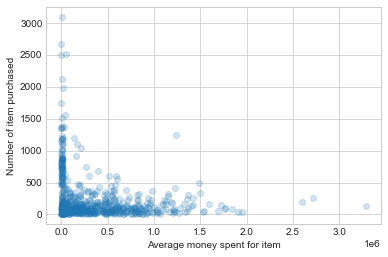

In [424]:
plt.style.use('seaborn-whitegrid')
plt.scatter(list(data_all['i']['money_spent']),list(data_all['t']['item']),marker='o',alpha=0.2)
plt.xlabel('Average money spent for item')
plt.ylabel('Number of item purchased')
plt.show()

In [480]:
mean_spend_per_itemtype = item_spend.groupby(['item_type','item_sub_type','item']).mean()
mean_spend_per_itemtype
#data_all1 = pd.concat([mean_spend_per_itemtype,item_frequency],axis=1,join='inner',keys='item')
#data_all1

account_id    money_spent
item_type item_sub_type item                                        
BIKE      MOTORCYCLE    Dinka Akuma       4778.461538    3590.480524
                        Dinka Double-T    4665.234375    4787.307365
                        Dinka Enduro      4324.919753   19149.229459
                        Dinka Thrust      4361.884615   29920.671030
                        Dinka Vindicator  4279.318182  241813.423143
...                                               ...            ...
WEAPON    SHOTGUNS      Musket            2666.777778    5106.594170
                        Pump Shotgun      4763.846637    1371.511322
                        Sweeper Shotgun   4724.164000    5864.586630
          SNIPER RIFLES Heavy Sniper      4751.211806   14638.635202
                        Sniper Rifle      4627.294694    7819.854897

[649 rows x 2 columns]

In [483]:
item_spend.groupby('item_type').mean().sort_values('money_spent')

,account_id,money_spent
item_type,,
CYCLE,4761.324753,1.349291e+03
WEAPON,4686.268912,1.288818e+04
BOAT,4428.348148,9.893133e+04
BIKE,4647.221796,2.371508e+05
HELICOPTER,4751.601864,2.725941e+05
CAR,4694.471318,2.790681e+05
PROPERTY,4761.651460,3.567896e+05
TRUCK,4703.270270,5.360383e+05
OTHER,4531.395486,1.013556e+06


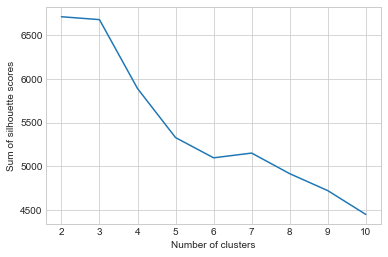

In [487]:
#Clustering
x = pd.concat([ind_avg_rank,ind_avg_daysplayed],axis=1)
x = np.array(x)
# Silhouette: How similar to points in cluster vs. others, arbitrariness

# Remember: each data point gets its own silhouette coefficient ranging 
# from 0 (arbitrary classification) to 1 (ideal classification).

# Init:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    
# Plot this to make it clearer what is going on
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

# kMeans gives you the center coordinates of the clusters, assuming a number
# of clusters. Silhouette gives you how many are most unamigously described
# by the clusters. Most likely "real" number: Where the sum of the
# silhouette scores peaks. In reality, they are complementary. Use together

# Recompute kMeans:
numClusters = 3
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_

In [488]:
cCoords

array([[  44.77270919,  142.48388664],
       [ 134.32930024,  743.10313152],
       [3749.74351433,  403.93325873]])

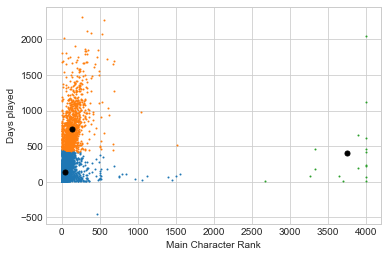

In [489]:
# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(x[plotIndex,0],x[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Main Character Rank')
    plt.ylabel('Days played')

In [501]:
time = gen_player_stats.groupby('occur_date').sum()
time

,account_id,ltd_days_played,evc_balance,pvc_balance,char_rank,daily_playtime
occur_date,,,,,,
2020-09-01,12141512,688435.0,2.128641e+12,5.462504e+07,188051.0,1758.482077
2020-09-02,12536842,686977.0,1.873118e+12,4.883001e+07,180009.0,1844.813185
2020-09-03,12419072,719405.0,1.951715e+12,6.144311e+07,183085.0,1888.429924
2020-09-04,12914056,716944.0,1.875426e+12,6.293132e+07,182527.0,1998.837820
2020-09-05,13456544,745767.0,2.027176e+12,7.613814e+07,189668.0,2130.295184
...,...,...,...,...,...,...
2020-11-26,14569924,919834.0,2.081641e+12,5.828235e+07,232569.0,2188.348730
2020-11-27,15306926,925876.0,2.536640e+11,5.712318e+07,236958.0,2379.693866
2020-11-28,16098920,959422.0,3.175417e+11,4.064976e+07,244462.0,2780.371249


In [500]:
x = time['occur_date']
y = time['daily_playtime']
plt.plot(x,y)

KeyError: 'occur_date'